# spectra_letgacis

In [1]:
# source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


## download


In [2]:
download_chandra_obsid 1198 evt1,flt,asol
mv -fv 1198/*/*fits.gz .
gunzip -f *fits.gz
rmdir 1198/primary
rmdir -p 1198/secondary


  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits       42 Mb  ####################          < 1 s  97164.3 kb/s
  asol     fits       10 Mb  ####################          < 1 s  91297.0 kb/s
  flt      fits        7 Kb  ####################          < 1 s  608.6 kb/s

      Total download size for ObsId 1198 = 53 Mb
      Total download time for ObsId 1198 = < 1 s

'1198/primary/pcadf063832996N003_asol1.fits.gz' -> './pcadf063832996N003_asol1.fits.gz'
'1198/secondary/acisf01198_000N003_evt1.fits.gz' -> './acisf01198_000N003_evt1.fits.gz'
'1198/secondary/acisf01198_000N003_flt1.fits.gz' -> './acisf01198_000N003_flt1.fits.gz'


## Create L1.5


### tgdetect2

In [3]:
pset tgdetect2 infile=acisf01198_000N003_evt1.fits
pset tgdetect2 outfile=acis_1198_src1a.fits
tgdetect2 mode=h clob+


[1] 13762
[1]+  Done                    ds9 acisf01198_000N003_evt1.fits -scale log -zoom 2 -region acis_1198_src1a.fits -saveimage png ds9_01.png


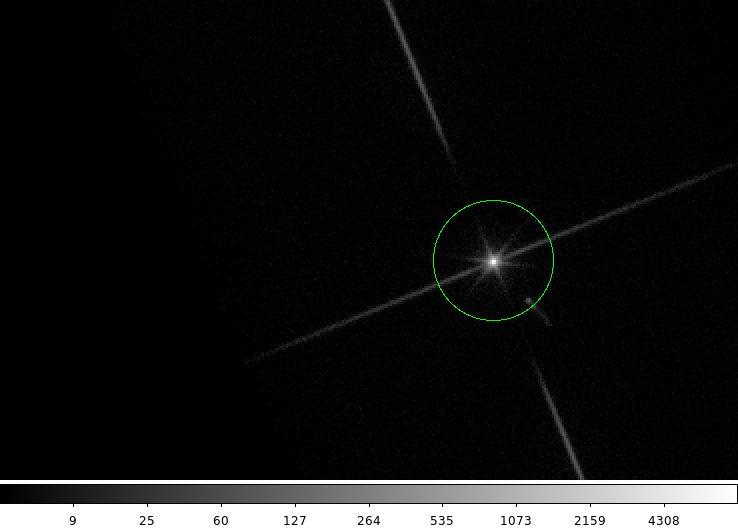

In [4]:
ds9 acisf01198_000N003_evt1.fits -scale log -zoom 2 \
  -region acis_1198_src1a.fits \
  -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit

display < ds9_01.png

### tg_create_mask

In [5]:
pset tg_create_mask infile=acisf01198_000N003_evt1.fits
pset tg_create_mask outfile=acis_1198_evt1_L1a.fits
pset tg_create_mask input_pos_tab=acis_1198_src1a.fits
tg_create_mask mode=h clob+


[1] 13808
[1]+  Done                    ds9 acisf01198_000N003_evt1.fits -scale log -bin factor 4 -region acis_1198_evt1_L1a.fits -saveimage png ds9_02.png


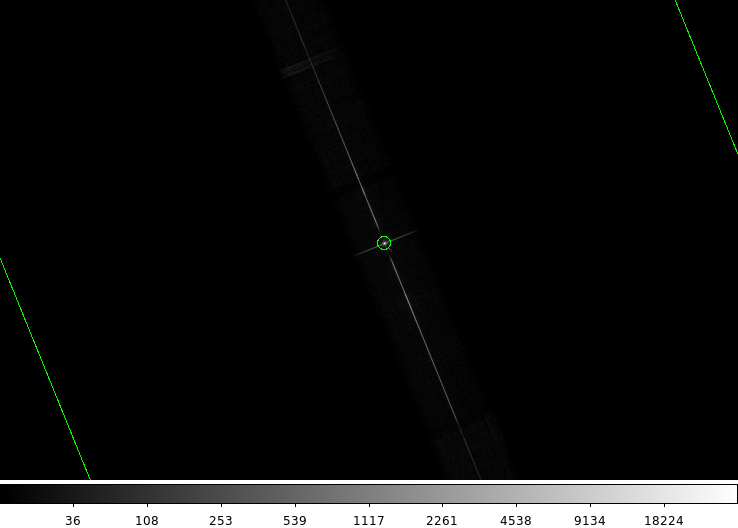

In [6]:
ds9 acisf01198_000N003_evt1.fits -scale log -bin factor 4 \
  -region acis_1198_evt1_L1a.fits \
  -saveimage png ds9_02.png &
sleep 10
xpaset -p ds9 quit

display < ds9_02.png

### tg_r_e

In [7]:
dmkeypar acisf01198_000N003_evt1.fits readmode echo+

TIMED


In [8]:
pget tg_resolve_events eventdef.p_value

)stdlev1_ACIS


In [9]:
pset tg_resolve_events infile=acisf01198_000N003_evt1.fits
pset tg_resolve_events outfile=acis_1198_evt1a.fits
pset tg_resolve_events regionfile=acis_1198_evt1_L1a.fits
pset tg_resolve_events acaofffile=pcadf063832996N003_asol1.fits
tg_resolve_events mode=h clob+


## Create L2


### grade/status

In [10]:
dmcopy "acis_1198_evt1a.fits[EVENTS][grade=0,2,3,4,6,status=0]" \
      acis_1198_flt_evt1a.fits opt=all clob+

### gti

In [11]:
dmcopy "acis_1198_flt_evt1a.fits[EVENTS][@acisf01198_000N003_flt1.fits][cols -phas]" \
      acis_1198_evt2.fits opt="" clob+

In [12]:
dmappend \
      "acis_1198_flt_evt1a.fits[region][subspace -time]" \
      acis_1198_evt2.fits

## Extract

In [13]:
pset tgextract infile=acis_1198_evt2.fits
pset tgextract outfile=acis_1198_pha2.fits
tgextract mode=h clob+


In [14]:
dmlist acis_1198_pha2.fits blocks

 
--------------------------------------------------------------------------------
Dataset: acis_1198_pha2.fits
--------------------------------------------------------------------------------
 
     Block Name                          Type         Dimensions
--------------------------------------------------------------------------------
Block    1: PRIMARY                        Null        
Block    2: SPECTRUM                       Table        13 cols x 6        rows
Block    3: REGION                         Table        10 cols x 18       rows


In [15]:
dmlist acis_1198_pha2.fits cols

 
--------------------------------------------------------------------------------
Columns for Table Block SPECTRUM
--------------------------------------------------------------------------------
 
ColNo  Name                 Unit        Type             Range            Null
   1   SPEC_NUM                          Int2           1:32767              -          Spectrum Number
   2   TG_M                              Int2           -62:62               99         Diffraction order (m)
   3   TG_PART                           Int2           0:99                 -          Spectral component (HEG, MEG, LEG, HESF parts)
   4   TG_SRCID                          Int2           1:32767              -          Source ID, output by detect
   5   X                    pixel        Real4          0.50:    65534.50    -          X sky coord of source
   6   Y                    pixel        Real4          0.50:    65534.50    -          Y sky coord of source
   7   CHANNEL[8192]                 

# Cleanup

In [16]:
/bin/rm -f acisf* pcadf*
